**Smart Crop Prediction**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import joblib

# Load the dataset
data = pd.read_csv('/content/Crop_Recommendation_TRAIN.csv')

# Define feature set and target variable
features = ['pH', 'Soil EC', 'Phosphorus', 'Potassium', 'Urea', 'T.S.P', 'M.O.P', 'Moisture', 'Temperature']
target = 'Plant Type'

X = data[features]
y = data[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'NaiveBayes': GaussianNB(),
    'NeuralNetwork': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Model Accuracy: {accuracy * 100:.2f}%")
    #joblib.dump(model, f'{model_name.lower()}_plant_type_classifier.pkl')
    #print(f"Model saved to {model_name.lower()}_plant_type_classifier.pkl")


RandomForest Model Accuracy: 90.72%
Model saved to randomforest_plant_type_classifier.pkl
SVM Model Accuracy: 88.98%
Model saved to svm_plant_type_classifier.pkl
GradientBoosting Model Accuracy: 91.03%
Model saved to gradientboosting_plant_type_classifier.pkl
NaiveBayes Model Accuracy: 89.12%
Model saved to naivebayes_plant_type_classifier.pkl
NeuralNetwork Model Accuracy: 88.64%
Model saved to neuralnetwork_plant_type_classifier.pkl



RandomForest Model Evaluation:
Training Accuracy: 0.91 ± 0.00
Test Accuracy: 0.91
Test Precision: 0.94
Test Recall: 0.91
Test F1 Score: 0.90


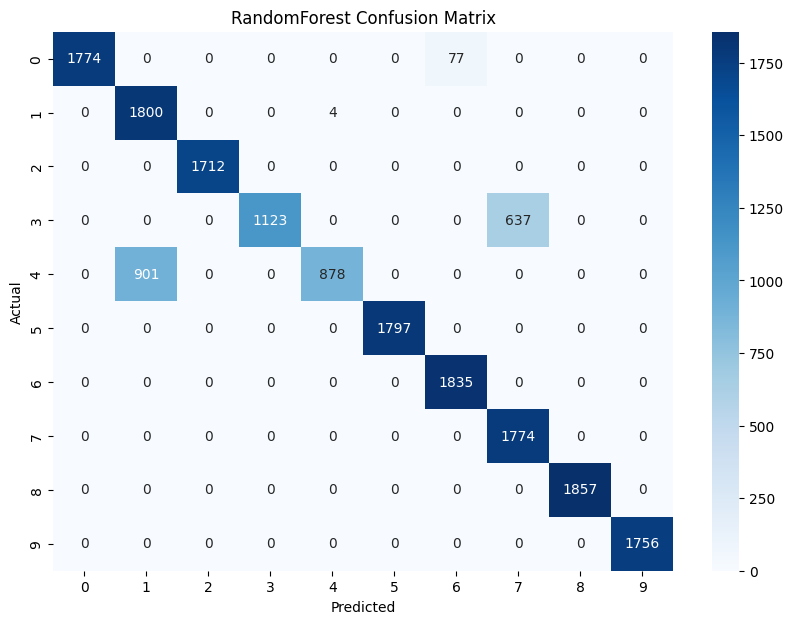

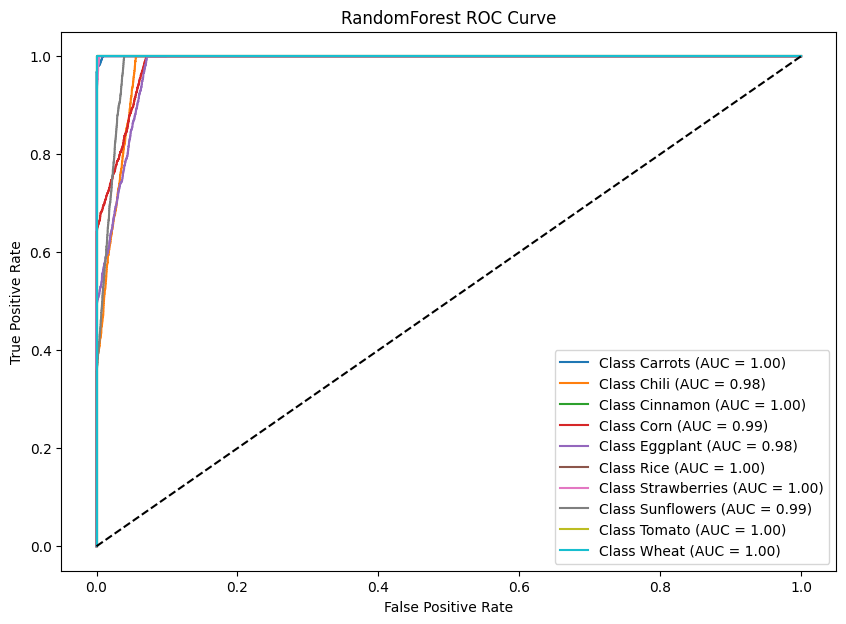


NaiveBayes Model Evaluation:
Training Accuracy: 0.89 ± 0.00
Test Accuracy: 0.89
Test Precision: 0.89
Test Recall: 0.89
Test F1 Score: 0.88


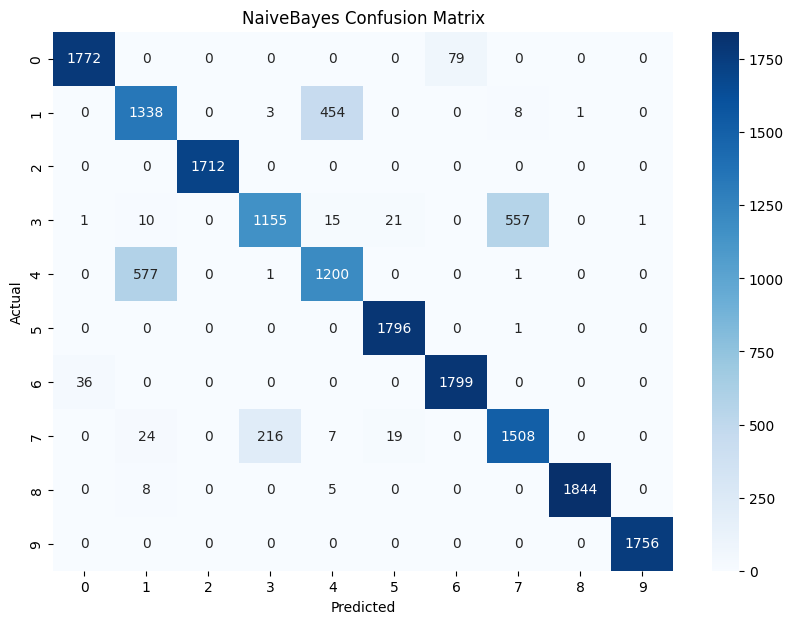

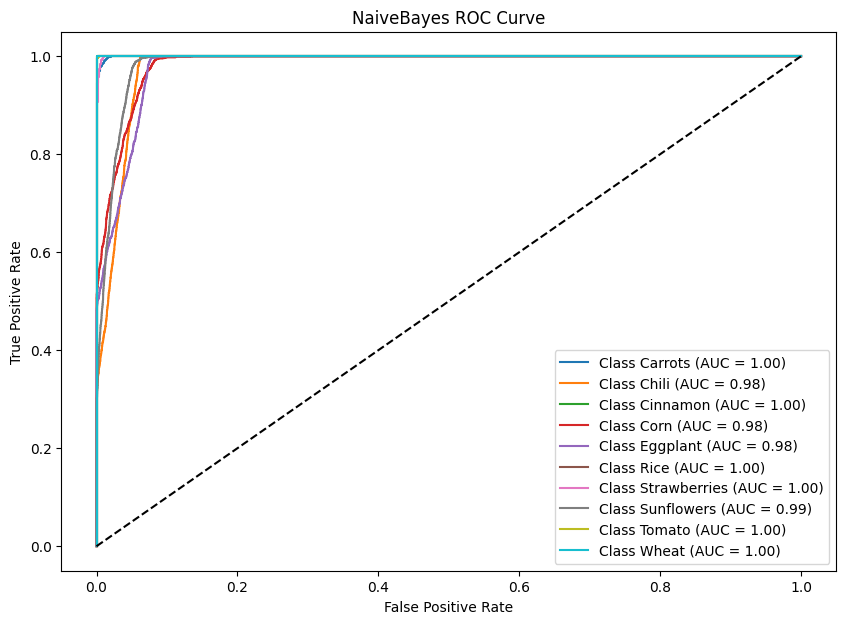

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/Crop_Recommendation_TRAIN.csv')

# Define feature set and target variable
features = ['pH', 'Soil EC', 'Phosphorus', 'Potassium', 'Urea', 'T.S.P', 'M.O.P', 'Moisture', 'Temperature']
target = 'Plant Type'

X = data[features]
y = data[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6251)

# Initialize the models
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=7, random_state=6251),
    #'SVM': SVC(kernel='linear', probability=True, random_state=6251),
    #'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=6251),
    'NaiveBayes': GaussianNB(),
    #'NeuralNetwork': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=6251)
}

# K-Fold Cross Validation on training set
kf = KFold(n_splits=5, shuffle=True, random_state=6251)

for model_name, model in models.items():
    print(f"\n{model_name} Model Evaluation:")

    # Cross-validation accuracy on training set
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    print(f"Training Accuracy: {cv_accuracy.mean():.2f} ± {cv_accuracy.std():.2f}")

    # Train the model on the entire training set
    model.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics on the test set
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"Test Accuracy: {accuracy:.2f}")
    print(f"Test Precision: {precision:.2f}")
    print(f"Test Recall: {recall:.2f}")
    print(f"Test F1 Score: {f1:.2f}")

    # Confusion Matrix on test set
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve on test set for overall model
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(len(model.classes_)):
            fpr[i], tpr[i], _ = roc_curve(y_test == model.classes_[i], y_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        plt.figure(figsize=(10, 7))
        for i in range(len(model.classes_)):
            plt.plot(fpr[i], tpr[i], label=f'Class {model.classes_[i]} (AUC = {roc_auc[i]:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} ROC Curve')
        plt.legend(loc='best')
        plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/Crop_Recommendation_TRAIN.csv')

# Define feature set and target variable
features = ['pH', 'Soil EC', 'Phosphorus', 'Potassium', 'Urea', 'T.S.P', 'M.O.P', 'Moisture', 'Temperature']
target = 'Plant Type'

X = data[features]
y = data[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models with hyperparameter grids for tuning
param_grids = {
    'SVM': {
        'model': SVC(probability=True, random_state=42),
        'params': {
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [0.1, 1, 10]
        }
    }
}

# Perform Grid Search for each model to find the best hyperparameters
best_models = {}
for model_name, config in param_grids.items():
    grid_search = GridSearchCV(config['model'], config['params'], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Evaluate the best models on the test set
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

    print(f"\n{model_name} - Test Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix on test set
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve on test set for overall model using One-vs-Rest (OvR) approach
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(len(model.classes_)):
            fpr[i], tpr[i], _ = roc_curve(y_test == model.classes_[i], y_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        plt.figure(figsize=(10, 7))
        for i in range(len(model.classes_)):
            plt.plot(fpr[i], tpr[i], label=f'Class {model.classes_[i]} (AUC = {roc_auc[i]:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} ROC Curve')
        plt.legend(loc='best')
        plt.show()